In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

filepath = 'C:/Users/19177/Documents/IBM Applied Data Science/titanic.csv'
titanic_df = pd.read_csv(filepath)
titanic_df = pd.DataFrame(titanic_df)

In [4]:
titanic_df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


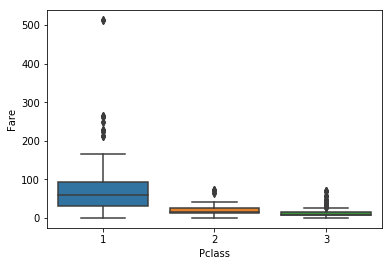

In [5]:
sns.boxplot(x='Pclass', y="Fare", data=titanic_df)

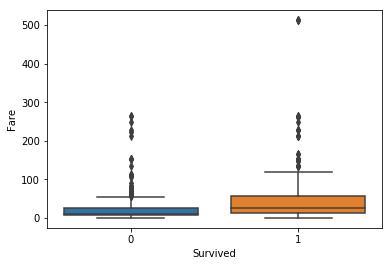

In [6]:
sns.boxplot(x='Survived', y='Fare', data=titanic_df)

In [42]:
titanic_df['Survived'].unique()

array([0, 1], dtype=int64)

In [28]:
pclass_counts = titanic_df['Pclass'].value_counts()

In [30]:
pclass_counts = pclass_counts.to_frame()

In [31]:
pclass_counts

,Pclass
3,487
1,216
2,184


In [32]:
pclass_counts.index.name = "Class Level"

In [33]:
pclass_counts

,Pclass
Class Level,
3,487
1,216
2,184


In [39]:
pclass_counts.rename(columns = {'Pclass': 'Instances'}, inplace = True)

In [40]:
pclass_counts

,Instances
Class Level,
3,487
1,216
2,184


In [61]:
df_comp = titanic_df[['Sex','Pclass','Fare']]

In [62]:
df_comp = df_comp.groupby(['Sex', 'Pclass'], as_index = False).mean()

In [63]:
df_comp

,Sex,Pclass,Fare
0,female,1,106.125798
1,female,2,21.970121
2,female,3,16.118810
3,male,1,67.226127
4,male,2,19.741782
5,male,3,12.695466


In [64]:
p1 = df_comp.pivot(index='Sex', columns = 'Pclass')

In [65]:
p1

Fare                      
Pclass           1          2          3
Sex                                     
female  106.125798  21.970121  16.118810
male     67.226127  19.741782  12.695466

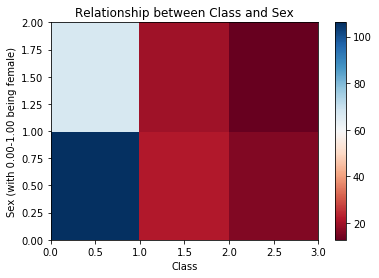

In [79]:
from matplotlib import pyplot as plt
%matplotlib inline

hmap = plt.pcolor(p1, cmap = 'RdBu')

plt.colorbar()
plt.title('Relationship between Class and Sex')
plt.xlabel('Class')
plt.ylabel(r'Sex (with 0.00-1.00 being female)')
plt.show()

In [94]:
group1 = titanic_df[['Pclass', 'Fare']]
group1 = group1.groupby(['Pclass'], as_index = False)

# If you don't put .mean(), you will get a GroupBy object instead of a DataFrame

# We don't need to take the mean because ANOVA will do it for us
group1

In [102]:
from scipy import stats
f_score, p_val = stats.f_oneway(group1.get_group(1)['Fare'], group1.get_group(2)['Fare'], group1.get_group(3)['Fare'])

In [103]:
print f_score, p_val

240.66041792910025 3.6153954125446083e-84


In [112]:
# 1. Create a separate df with the variables you want to analyze (pick two, independent and dependent).
# 2. Group them by the various instances of one variable, but don't find the mean. You've created a groupby object
# 3. Do the ANOVA test

dfg = titanic_df[['Pclass', 'Fare']]
dfgb = dfg.groupby(['Pclass'])
f_score, p_val = stats.f_oneway(dfgb.get_group(1)['Fare'], dfgb.get_group(2)['Fare'])

print f_score, p_val

117.75709684011746 3.3036441731206045e-24


In [121]:
# 1. Now find the different that class makes in terms of the fare between 2nd and 3rd class

dfg2 = titanic_df[['Pclass', 'Fare']]
dfgb2 = dfg.groupby(['Pclass'])
f_score, p_val = stats.f_oneway(dfgb2.get_group(2)['Fare'], dfgb2.get_group(3)['Fare'])

print f_score, p_val

42.860533808741344 1.1711045532748957e-10


In [127]:
# 1. Comparing 1st and 3rd classes
dfg3 = titanic_df[['Pclass', 'Fare']]
dfgb3 = dfg3.groupby(['Pclass'])
f_score, p_val = stats.f_oneway(dfgb3.get_group(1)['Fare'], dfgb3.get_group(3)['Fare'])

print 'The ANOVA scores are as follows: \nThe f-score is ' + str(f_score) + " and the p-value is " + str(p_val)

The ANOVA scores are as follows: 
The f-score is 374.8487492376559 and the p-value is 3.1775247966209995e-67
